<a href="https://colab.research.google.com/github/Lisarika-kanchumarthi/Health_Data_Dashboard/blob/main/health_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary Packages**

In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import os

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Load and Combined Datasets**

In [3]:
# Paths to folders
folder1_path = '/content/drive/My Drive/Fitabase Data 3.12.16-4.11.16'
folder2_path = '/content/drive/My Drive/Fitabase Data 4.12.16-5.12.16'

# Combine files with the same names across folders
combined_data = {}
for file_name in set(os.listdir(folder1_path) + os.listdir(folder2_path)):
    df_list = []
    if file_name in os.listdir(folder1_path):
        df_list.append(pd.read_csv(os.path.join(folder1_path, file_name)))
    if file_name in os.listdir(folder2_path):
        df_list.append(pd.read_csv(os.path.join(folder2_path, file_name)))
    if df_list:
        combined_data[file_name] = pd.concat(df_list, ignore_index=True)
        print(f"Combined {file_name}: {combined_data[file_name].shape}")


Combined dailyCalories_merged.csv: (940, 3)
Combined minuteCaloriesWide_merged.csv: (21645, 62)
Combined minuteMETsNarrow_merged.csv: (2770620, 3)
Combined minuteCaloriesNarrow_merged.csv: (2770620, 3)
Combined minuteIntensitiesNarrow_merged.csv: (2770620, 3)
Combined dailySteps_merged.csv: (940, 3)
Combined weightLogInfo_merged.csv: (100, 8)
Combined hourlyIntensities_merged.csv: (46183, 4)
Combined dailyActivity_merged.csv: (1397, 15)
Combined heartrate_seconds_merged.csv: (3638339, 3)
Combined minuteSleep_merged.csv: (387080, 4)
Combined hourlySteps_merged.csv: (46183, 3)
Combined dailyIntensities_merged.csv: (940, 10)
Combined sleepDay_merged.csv: (413, 5)
Combined minuteStepsWide_merged.csv: (21645, 62)
Combined hourlyCalories_merged.csv: (46183, 3)
Combined minuteStepsNarrow_merged.csv: (2770620, 3)
Combined minuteIntensitiesWide_merged.csv: (21645, 62)


**Saved Combined Datasets**

In [4]:
# Save combined datasets
for file_name, df in combined_data.items():
    output_path = f"/content/drive/My Drive/combined_{file_name}"
    df.to_csv(output_path, index=False)
    print(f"Saved {file_name} to {output_path}")


Saved dailyCalories_merged.csv to /content/drive/My Drive/combined_dailyCalories_merged.csv
Saved minuteCaloriesWide_merged.csv to /content/drive/My Drive/combined_minuteCaloriesWide_merged.csv
Saved minuteMETsNarrow_merged.csv to /content/drive/My Drive/combined_minuteMETsNarrow_merged.csv
Saved minuteCaloriesNarrow_merged.csv to /content/drive/My Drive/combined_minuteCaloriesNarrow_merged.csv
Saved minuteIntensitiesNarrow_merged.csv to /content/drive/My Drive/combined_minuteIntensitiesNarrow_merged.csv
Saved dailySteps_merged.csv to /content/drive/My Drive/combined_dailySteps_merged.csv
Saved weightLogInfo_merged.csv to /content/drive/My Drive/combined_weightLogInfo_merged.csv
Saved hourlyIntensities_merged.csv to /content/drive/My Drive/combined_hourlyIntensities_merged.csv
Saved dailyActivity_merged.csv to /content/drive/My Drive/combined_dailyActivity_merged.csv
Saved heartrate_seconds_merged.csv to /content/drive/My Drive/combined_heartrate_seconds_merged.csv
Saved minuteSleep_me

**Check for missing values**

In [5]:
# Check and handle missing values
missing_summary = {file_name: df.isnull().sum() for file_name, df in combined_data.items()}
for file_name, missing_counts in missing_summary.items():
    print(f"\nMissing values in {file_name}:\n{missing_counts}")


Missing values in dailyCalories_merged.csv:
Id             0
ActivityDay    0
Calories       0
dtype: int64

Missing values in minuteCaloriesWide_merged.csv:
Id              0
ActivityHour    0
Calories00      0
Calories01      0
Calories02      0
               ..
Calories55      0
Calories56      0
Calories57      0
Calories58      0
Calories59      0
Length: 62, dtype: int64

Missing values in minuteMETsNarrow_merged.csv:
Id                0
ActivityMinute    0
METs              0
dtype: int64

Missing values in minuteCaloriesNarrow_merged.csv:
Id                0
ActivityMinute    0
Calories          0
dtype: int64

Missing values in minuteIntensitiesNarrow_merged.csv:
Id                0
ActivityMinute    0
Intensity         0
dtype: int64

Missing values in dailySteps_merged.csv:
Id             0
ActivityDay    0
StepTotal      0
dtype: int64

Missing values in weightLogInfo_merged.csv:
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat      

In [6]:
# Drop the 'Fat' column from weightLogInfo_merged.csv
if 'Fat' in combined_data['weightLogInfo_merged.csv'].columns:
    combined_data['weightLogInfo_merged.csv'].drop(columns=['Fat'], inplace=True)
    print("Dropped 'Fat' column due to high missing values.")

Dropped 'Fat' column due to high missing values.


**Remove Duplicates**

In [7]:
# Remove duplicates
for file_name, df in combined_data.items():
    before = len(df)
    combined_data[file_name] = df.drop_duplicates()
    after = len(combined_data[file_name])
    print(f"{file_name}: Removed {before - after} duplicates, {after} rows remain.")

dailyCalories_merged.csv: Removed 0 duplicates, 940 rows remain.
minuteCaloriesWide_merged.csv: Removed 0 duplicates, 21645 rows remain.
minuteMETsNarrow_merged.csv: Removed 10500 duplicates, 2760120 rows remain.
minuteCaloriesNarrow_merged.csv: Removed 10500 duplicates, 2760120 rows remain.
minuteIntensitiesNarrow_merged.csv: Removed 10500 duplicates, 2760120 rows remain.
dailySteps_merged.csv: Removed 0 duplicates, 940 rows remain.
weightLogInfo_merged.csv: Removed 2 duplicates, 98 rows remain.
hourlyIntensities_merged.csv: Removed 175 duplicates, 46008 rows remain.
dailyActivity_merged.csv: Removed 0 duplicates, 1397 rows remain.
heartrate_seconds_merged.csv: Removed 23424 duplicates, 3614915 rows remain.
minuteSleep_merged.csv: Removed 4300 duplicates, 382780 rows remain.
hourlySteps_merged.csv: Removed 175 duplicates, 46008 rows remain.
dailyIntensities_merged.csv: Removed 0 duplicates, 940 rows remain.
sleepDay_merged.csv: Removed 3 duplicates, 410 rows remain.
minuteStepsWide_me

**Data Preprocessing**

In [8]:
# Converting ActivityDate and SleepDay to datetime before the merge
combined_data['dailyActivity_merged.csv']['ActivityDate'] = pd.to_datetime(combined_data['dailyActivity_merged.csv']['ActivityDate'])
combined_data['sleepDay_merged.csv']['SleepDay'] = pd.to_datetime(combined_data['sleepDay_merged.csv']['SleepDay'])

# Step 1: Merging dailyActivity with sleepDay
merged_data = pd.merge(
    combined_data['dailyActivity_merged.csv'],
    combined_data['sleepDay_merged.csv'],
    left_on=['Id', 'ActivityDate'],
    right_on=['Id', 'SleepDay'],
    how='inner'
)

# Step 2: Converting Date column in weightLogInfo to datetime
combined_data['weightLogInfo_merged.csv']['Date'] = pd.to_datetime(combined_data['weightLogInfo_merged.csv']['Date'])

# **Also convert ActivityDate to datetime in merged_data before merging with weightLogInfo**
merged_data['ActivityDate'] = pd.to_datetime(merged_data['ActivityDate'])

# Step 3: Merge with weightLogInfo
merged_data = pd.merge(
    merged_data,
    combined_data['weightLogInfo_merged.csv'],
    left_on=['Id', 'ActivityDate'],
    right_on=['Id', 'Date'],
    how='left'
)

# Step 4: Clean up unnecessary columns (_x/_y suffixes and redundant columns)
columns_to_drop = [col for col in merged_data.columns if col.endswith('_y')]
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')
merged_data = merged_data.rename(columns=lambda col: col.rstrip('_x'))
merged_data = merged_data.drop(columns=['Date'], errors='ignore')

# Step 5: Drop weight-related columns
columns_to_drop = ['WeightKg', 'WeightPounds', 'BMI', 'IsManualReport', 'LogId']
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

# Step 6: Handle missing values in 'Value' (Heart Rate) - Check for column name
if 'Value' in merged_data.columns:
    merged_data['Value'] = merged_data['Value'].fillna(merged_data['Value'].mean())
else:
    print("'Value' column not found. It might have been renamed or dropped.")
    if 'HeartRate' in merged_data.columns:
        merged_data['HeartRate'] = merged_data['HeartRate'].fillna(merged_data['HeartRate'].mean())

# Verifying the cleaned data
print("Missing values in each column after handling:\n", merged_data.isnull().sum())

# Step 7: Saving the cleaned dataset
merged_data.to_csv('/content/drive/My Drive/final_cleaned_data.csv', index=False)
print("Final cleaned dataset saved to 'final_cleaned_data.csv'.")
print("Final cleaned dataset preview:\n", merged_data.head())
print("Final cleaned dataset shape:", merged_data.shape)


<ipython-input-8-e5839dac67c3>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['sleepDay_merged.csv']['SleepDay'] = pd.to_datetime(combined_data['sleepDay_merged.csv']['SleepDay'])
<ipython-input-8-e5839dac67c3>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['weightLogInfo_merged.csv']['Date'] = pd.to_datetime(combined_data['weightLogInfo_merged.csv']['Date'])


'Value' column not found. It might have been renamed or dropped.
Missing values in each column after handling:
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64
Final cleaned dataset saved to 'final_cleaned_data.csv'.
Final cleaned dataset preview:
            Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12         224           0.14             0.14   
1  1927972279   2016-04-12          24           0.02             0.

**Exploratory Data Analysis (EDA)**

Missing values in each column:
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

Summary statistics:
                  Id                   ActivityDate    TotalSteps  \
count  4.220000e+02                            422    422.000000   
mean   4.993630e+09  2016-04-26 01:45:46.919431424   8309.123223   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    3.977334e+09            2016-04-19 00:00:00   4949.500000   
50%    4.702922e+09    

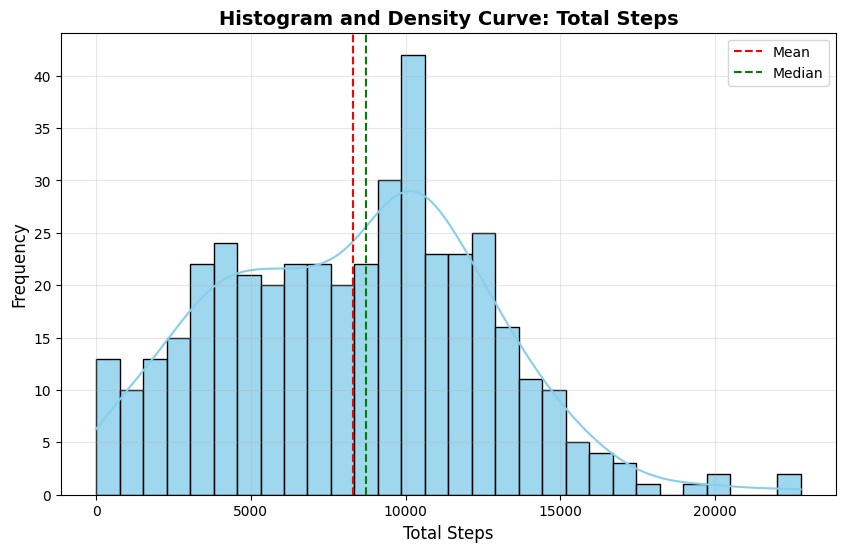

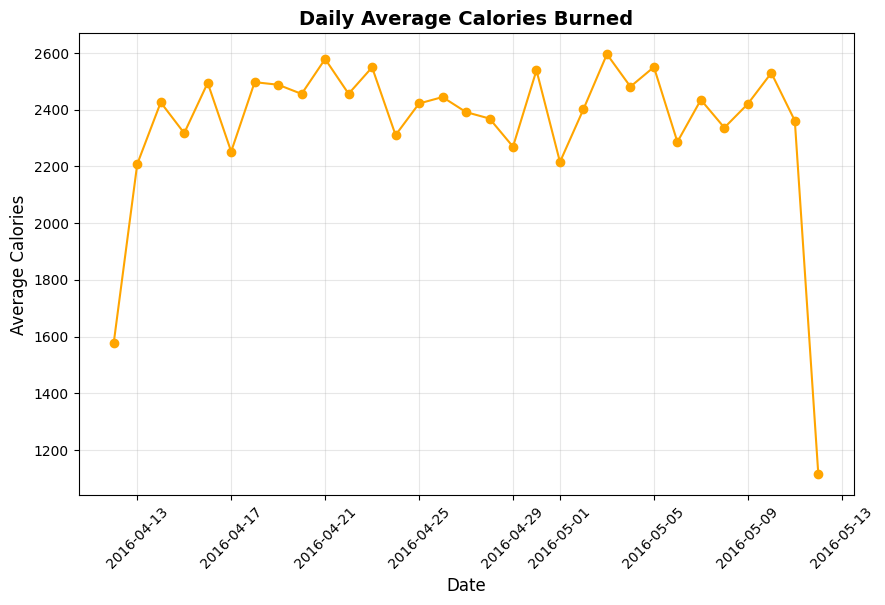

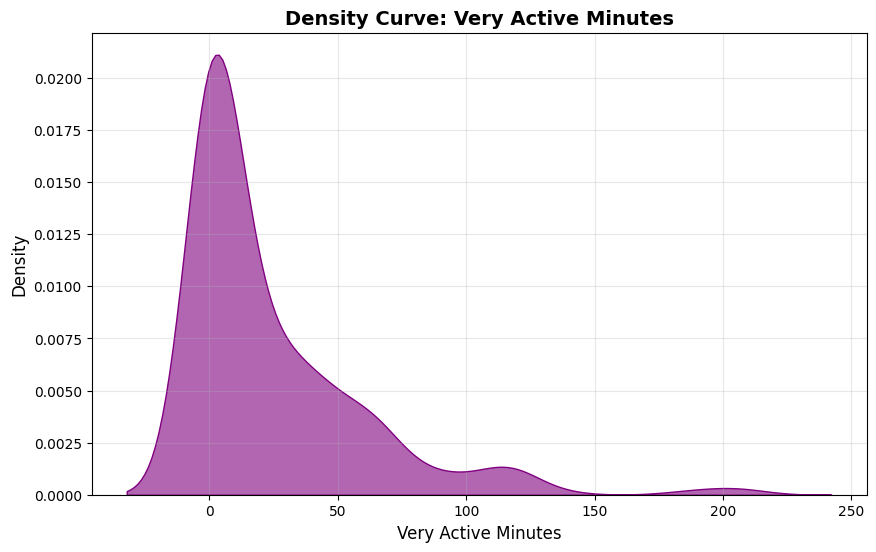

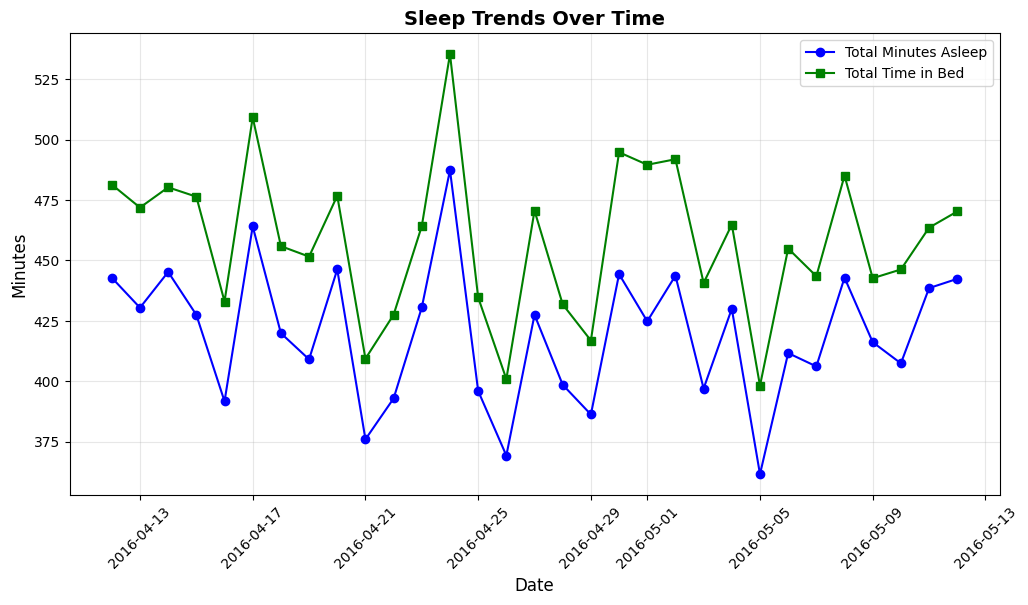

In [9]:
# 1. Check for missing values
print("Missing values in each column:\n", merged_data.isnull().sum())

# 2. Summary statistics
print("\nSummary statistics:\n", merged_data.describe())

# 3. Histogram and Density Curve: Total Steps
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalSteps'], bins=30, kde=True, color='skyblue', alpha=0.8, edgecolor='black')
plt.axvline(merged_data['TotalSteps'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(merged_data['TotalSteps'].median(), color='green', linestyle='--', label='Median')
plt.title('Histogram and Density Curve: Total Steps', fontsize=14, fontweight='bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Line Plot: Daily Average Calories Burned
daily_calories = merged_data.groupby('ActivityDate')['Calories'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_calories['ActivityDate'], daily_calories['Calories'], marker='o', linestyle='-', color='orange')
plt.title('Daily Average Calories Burned', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Calories', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

# 5. Density Plot: Very Active Minutes
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_data['VeryActiveMinutes'], fill=True, color='purple', alpha=0.6)
plt.title('Density Curve: Very Active Minutes', fontsize=14, fontweight='bold')
plt.xlabel('Very Active Minutes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 6. Line Plot: Sleep Trends Over Time
sleep_trends = merged_data.groupby('ActivityDate')[['TotalMinutesAsleep', 'TotalTimeInBed']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sleep_trends['ActivityDate'], sleep_trends['TotalMinutesAsleep'], marker='o', color='blue', label='Total Minutes Asleep')
plt.plot(sleep_trends['ActivityDate'], sleep_trends['TotalTimeInBed'], marker='s', color='green', label='Total Time in Bed')
plt.title('Sleep Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Minutes', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()



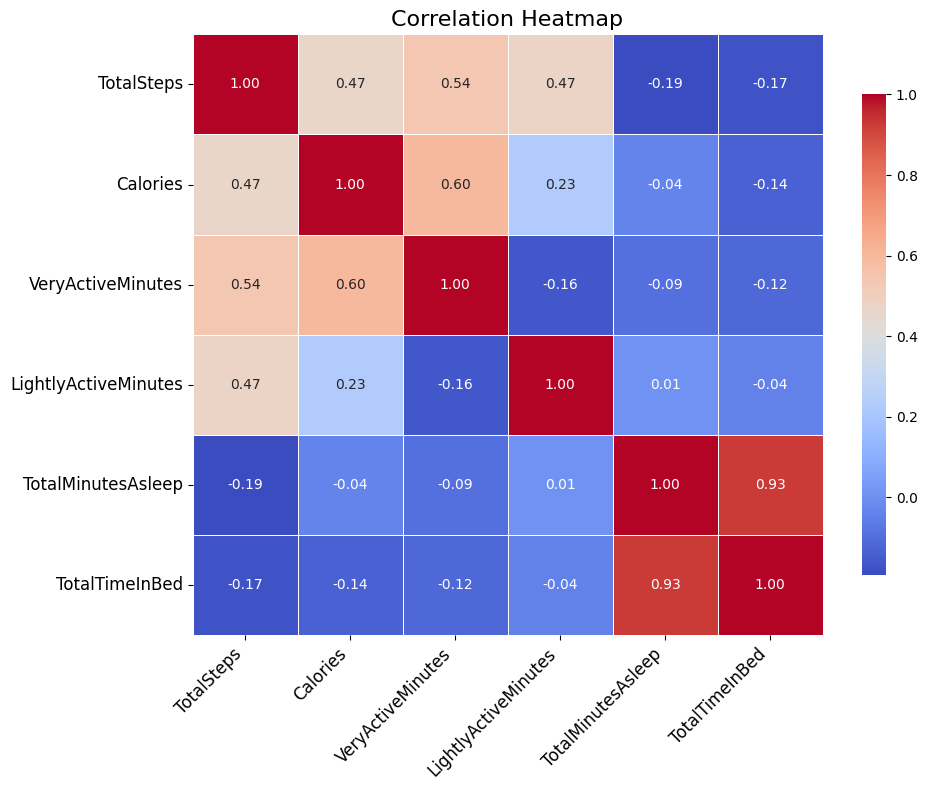

In [10]:
# Select relevant variables
selected_columns = ['TotalSteps', 'Calories', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed']

# Compute correlation matrix
correlation_matrix = merged_data[selected_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8}, linewidths=0.5
)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Feature Engineering**

In [11]:
# Create New Features
merged_data['ActiveTimeRatio'] = (
    merged_data['VeryActiveMinutes'] /
    (merged_data['VeryActiveMinutes'] + merged_data['LightlyActiveMinutes'] + merged_data['SedentaryMinutes'])
).fillna(0)  # Handle division by zero

merged_data['SleepEfficiency'] = (
    merged_data['TotalMinutesAsleep'] / merged_data['TotalTimeInBed']
).fillna(0)  # Handle missing or zero TotalTimeInBed

merged_data['DistancePerStep'] = (
    merged_data['TotalDistance'] / merged_data['TotalSteps']
).fillna(0)  # Handle division by zero

merged_data['ActiveMinutesRatio'] = (
    merged_data['VeryActiveMinutes'] / merged_data['LightlyActiveMinutes']
).fillna(0)  # Handle division by zero

# Normalize Continuous Features
from sklearn.preprocessing import MinMaxScaler

# List of features to normalize
features_to_normalize = ['TotalSteps', 'Calories', 'VeryActiveMinutes',
                         'LightlyActiveMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed',
                         'ActiveTimeRatio', 'SleepEfficiency', 'DistancePerStep', 'ActiveMinutesRatio']

# Min-Max Scaling
scaler = MinMaxScaler()
merged_data_normalized = merged_data.copy()
merged_data_normalized[features_to_normalize] = scaler.fit_transform(merged_data[features_to_normalize])

# Preview the transformed dataset
print("New Features Created and Normalized Dataset Preview:")
print(merged_data_normalized.head())

# Save the updated dataset
merged_data_normalized.to_csv('/content/drive/My Drive/final_feature_engineered_data.csv', index=False)


New Features Created and Normalized Dataset Preview:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12    0.009838           0.14             0.14   
1  1927972279   2016-04-12    0.001054           0.02             0.02   
2  2026352035   2016-04-12    0.044752           0.63             0.63   
3  3977333714   2016-04-12    0.033333           0.57             0.57   
4  4020332650   2016-04-12    0.000351           0.01             0.01   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                 0.0                       0.0   
1                       0.0                 0.0                       0.0   
2                       0.0                 0.0                       0.0   
3                       0.0                 0.0                       0.0   
4                       0.0                 0.0                       0.0   

   LightActiveDistance  SedentaryActive

**Visualizing Distributions of New Features**

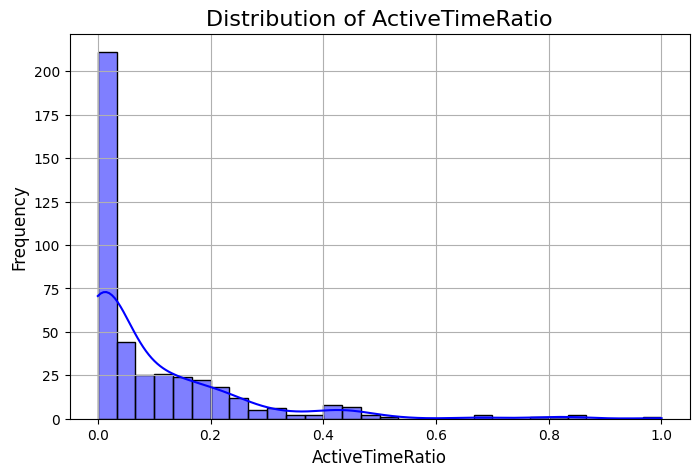

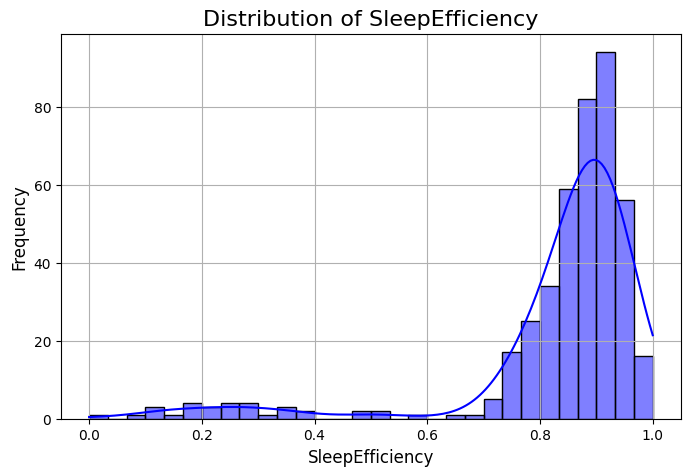

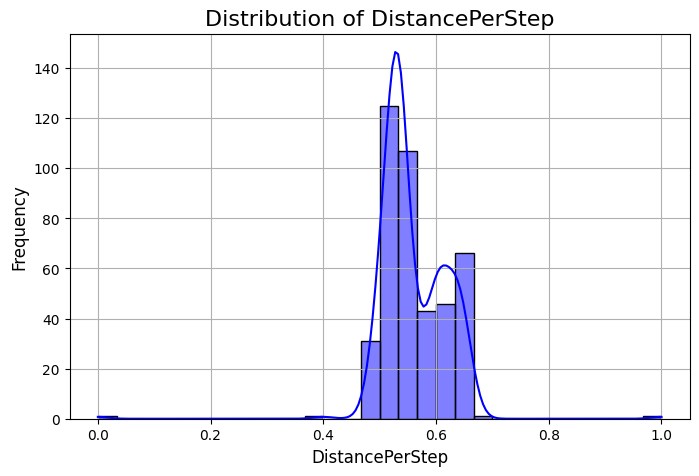

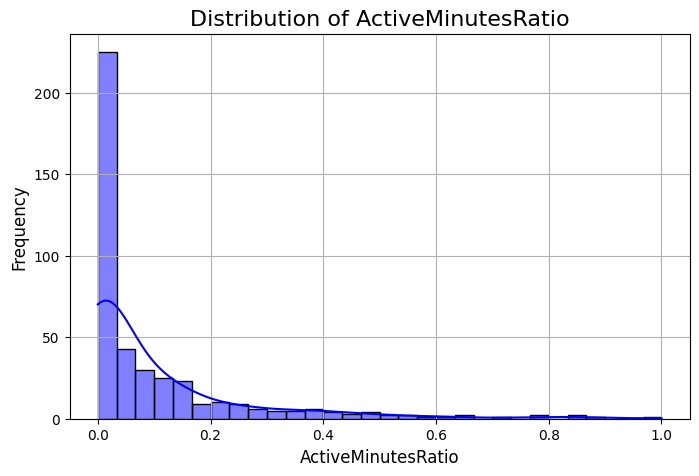

In [12]:
# Visualize distributions of new features
features_to_plot = ['ActiveTimeRatio', 'SleepEfficiency', 'DistancePerStep', 'ActiveMinutesRatio']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data_normalized[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()


**Filtering and Saving the Final Dataset**

Filtered dataset saved to 'filtered_dataset.csv'.

Filtered dataset preview:
           Id ActivityDate  TotalSteps  VeryActiveMinutes  \
0  1503960366   2016-04-12         224                  0   
1  1927972279   2016-04-12          24                  0   
2  2026352035   2016-04-12        1019                  0   
3  3977333714   2016-04-12         759                  0   
4  4020332650   2016-04-12           8                  0   

   LightlyActiveMinutes  SedentaryMinutes  TotalMinutesAsleep  TotalTimeInBed  \
0                     9                32                 327             346   
1                     3               161                 750             775   
2                    64               223                 503             546   
3                    17               187                 274             469   
4                     1               321                 501             541   

   SleepEfficiency  DistancePerStep  ActiveMinutesRatio  Calories  
0

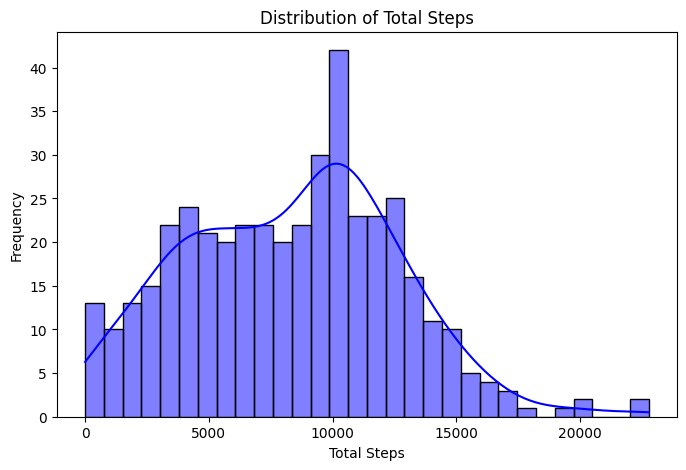

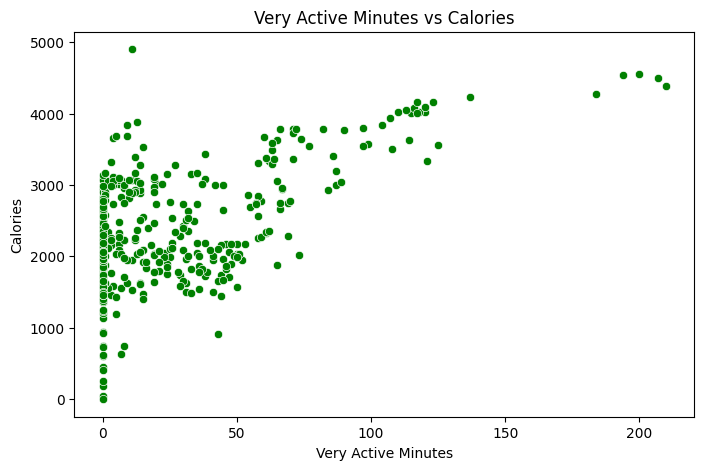

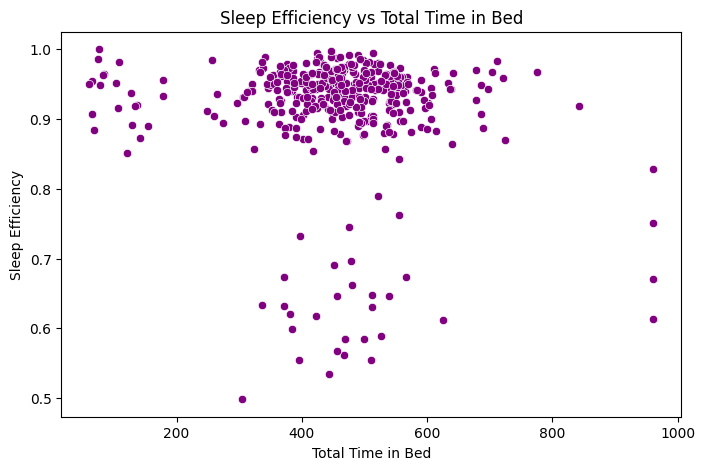

In [13]:
# List of features to retain based on analysis
features_to_keep = [
    'Id', 'ActivityDate', 'TotalSteps', 'VeryActiveMinutes',
    'LightlyActiveMinutes', 'SedentaryMinutes',
    'TotalMinutesAsleep', 'TotalTimeInBed', 'SleepEfficiency',
    'DistancePerStep', 'ActiveMinutesRatio', 'Calories'
]

# Step 1: Filter the dataset to retain only necessary features
filtered_data = merged_data[features_to_keep]

# Step 2: Save the filtered dataset to a CSV file
filtered_data.to_csv('/content/filtered_dataset.csv', index=False)
print("Filtered dataset saved to 'filtered_dataset.csv'.")

# Step 3: Verify the filtered dataset
print("\nFiltered dataset preview:")
print(filtered_data.head())

# Step 4: Check for missing values in the filtered dataset
print("\nMissing values in the filtered dataset:")
print(filtered_data.isnull().sum())

# Step 5: Analyze distributions of key features (optional visualizations)
# Plot: Distribution of TotalSteps
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['TotalSteps'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()

# Plot: Relationship between Active Minutes and Calories
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_data, x='VeryActiveMinutes', y='Calories', color='green')
plt.title('Very Active Minutes vs Calories')
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')
plt.show()

# Plot: Sleep Efficiency vs Total Time in Bed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_data, x='TotalTimeInBed', y='SleepEfficiency', color='purple')
plt.title('Sleep Efficiency vs Total Time in Bed')
plt.xlabel('Total Time in Bed')
plt.ylabel('Sleep Efficiency')
plt.show()


**Preparing Features and Target for Modeling**

In [14]:
# Load the filtered dataset (assuming it's saved as 'filtered_dataset.csv')
df = pd.read_csv('filtered_dataset.csv')

# Define the features and target variable
features = [
    'TotalSteps',
    'VeryActiveMinutes',
    'LightlyActiveMinutes',
    'SedentaryMinutes',
    'TotalMinutesAsleep',
    'TotalTimeInBed',
    'SleepEfficiency',
    'DistancePerStep',
    'ActiveMinutesRatio'
]

target = 'Calories'

# Filter the dataset to include only the selected features and target
X = df[features]
y = df[target]

# Print the selected features and their statistics
print("Selected Features for Modeling:")
print(X.describe())

print("\nTarget Variable Summary:")
print(y.describe())

# Save the feature dataset and target variable for ML purposes
X.to_csv('ml_features.csv', index=False)
y.to_csv('ml_target.csv', index=False)

print("\nFeature dataset saved as 'ml_features.csv'.")
print("Target dataset saved as 'ml_target.csv'.")


Selected Features for Modeling:
         TotalSteps  VeryActiveMinutes  LightlyActiveMinutes  \
count    422.000000         422.000000            422.000000   
mean    8309.123223          24.606635            211.049763   
std     4281.942298          35.957176             91.378412   
min        0.000000           0.000000              0.000000   
25%     4949.500000           0.000000            153.000000   
50%     8735.000000           8.000000            206.000000   
75%    11190.000000          37.750000            261.500000   
max    22770.000000         210.000000            518.000000   

       SedentaryMinutes  TotalMinutesAsleep  TotalTimeInBed  SleepEfficiency  \
count        422.000000          422.000000      422.000000       422.000000   
mean         700.713270          419.874408      459.184834         0.916484   
std          187.483639          118.677574      127.024934         0.087730   
min            0.000000           58.000000       61.000000         0.4

Model Comparison Across Multiple Models

In [15]:
# Model Comparison: Linear Regression, Random Forest, Gradient Boosting


# Step 1: Load Dataset
# Load the pre-processed dataset containing features and target variable
df = pd.read_csv('/content/filtered_dataset.csv')  # Adjust the path if needed

# Define the features used for prediction and the target variable
features = [
    'TotalSteps', 'VeryActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed',
    'SleepEfficiency', 'DistancePerStep', 'ActiveMinutesRatio'
]
target = 'Calories'

# Separate features and target into X and y
X = df[features]
y = df[target]


# Step 2: Train-Test Split
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define Models
# Define the models to be compared
models = {
    'Linear Regression': LinearRegression(),  # Simple regression model
    'Random Forest': RandomForestRegressor(random_state=42),  # Ensemble-based model
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)  # Boosting-based model
}


# Step 4: Train Models and Evaluate
# Create a list to store the results for each model
results = []

for model_name, model in models.items():
    # Train the current model using the training data
    model.fit(X_train, y_train)

    # Make predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics for the training set
    train_mae = mean_absolute_error(y_train, y_train_pred)  # Mean Absolute Error
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Root Mean Squared Error
    train_r2 = r2_score(y_train, y_train_pred)  # R-squared score

    # Calculate performance metrics for the testing set
    test_mae = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error
    test_r2 = r2_score(y_test, y_test_pred)  # R-squared score

    # Append the results to the list
    results.append({
        'Model': model_name,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    })

# Step 5: Displaying Results
# Convert the results into a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the evaluation metrics for each model
print("Model Comparison Results:")
print(results_df)


Model Comparison Results:
               Model   Train MAE    Test MAE  Train RMSE   Test RMSE  \
0  Linear Regression  284.755811  301.082650  393.342332  373.110543   
1      Random Forest   71.074807  203.605059  112.426936  296.715157   
2  Gradient Boosting   77.695529  224.350871  105.564440  305.147425   

   Train R²   Test R²  
0  0.768827  0.748083  
1  0.981114  0.840683  
2  0.983349  0.831499  


**Random Forest Hyperparameter Tunning**

In [16]:
# Load the dataset
df = pd.read_csv('/content/filtered_dataset.csv')  # Adjust the path if necessary

# Define features and target variable
features = [
    'TotalSteps', 'VeryActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed',
    'SleepEfficiency', 'DistancePerStep', 'ActiveMinutesRatio'
]
target = 'Calories'

X = df[features]  # Features for prediction
y = df[target]    # Target variable

# Scale the features for consistent model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 400, 600, 800],  # Number of trees
    'max_depth': [10, 20, 30, 40, 50, None],    # Maximum tree depth
    'min_samples_split': [2, 5, 10],            # Minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],              # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]      # Features considered at each split
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,                 # Random Forest model
    param_distributions=param_dist,     # Parameter grid
    n_iter=50,                          # Number of random combinations to try
    cv=5,                               # 5-fold cross-validation
    scoring='neg_mean_squared_error',   # Evaluation metric
    verbose=2,                          # Verbose output
    random_state=42,                    # Ensure reproducibility
    n_jobs=-1                           # Use all available processors
)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Output the best hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on training and testing data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate performance metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)  # Mean Absolute Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Root Mean Squared Error
train_r2 = r2_score(y_train, y_train_pred)  # R-squared

# Calculate performance metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error
test_r2 = r2_score(y_test, y_test_pred)  # R-squared

# Print evaluation results for training and testing sets
print("\nRandom Forest with Tuned Hyperparameters - Training Set Performance:")
print(f"  MAE: {train_mae:.2f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  R-squared: {train_r2:.2f}")

print("\nRandom Forest with Tuned Hyperparameters - Testing Set Performance:")
print(f"  MAE: {test_mae:.2f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  R-squared: {test_r2:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Random Forest with Tuned Hyperparameters - Training Set Performance:
  MAE: 72.18
  RMSE: 107.84
  R-squared: 0.98

Random Forest with Tuned Hyperparameters - Testing Set Performance:
  MAE: 210.86
  RMSE: 287.86
  R-squared: 0.85


**Actual vs Predicted Analysis**

Actual vs Predicted Comparison:
   Actual    Predicted
0    1593  1694.553750
1    1740  1942.965302
2    3013  3061.111477
3    2735  2785.341250
4    1962  1630.031250


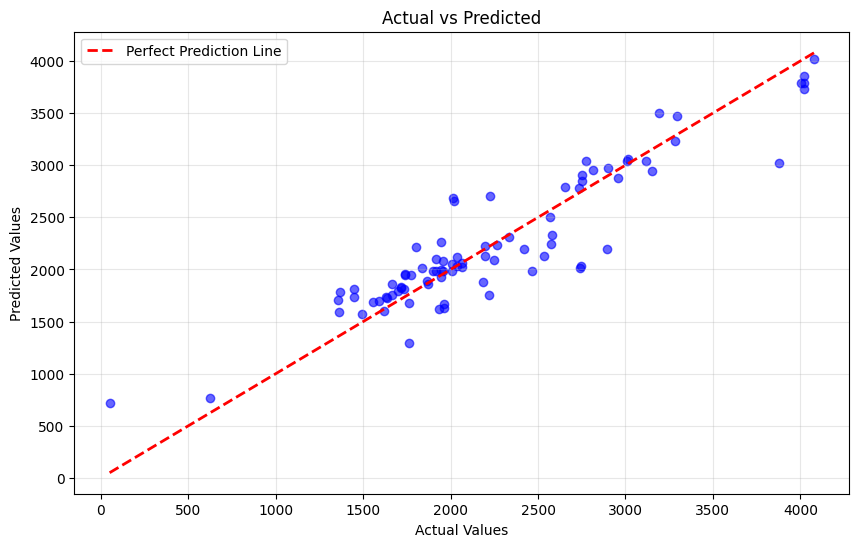

Actual vs Predicted results saved to 'actual_vs_predicted.csv'.


In [17]:
# Generate predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
}).reset_index(drop=True)

# Display the first few rows for verification
print("Actual vs Predicted Comparison:")
print(comparison_df.head())

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.6, color='blue')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Save the comparison to a CSV file (optional)
comparison_df.to_csv('/content/actual_vs_predicted.csv', index=False)
print("Actual vs Predicted results saved to 'actual_vs_predicted.csv'.")